## Task-2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## 1.EDA

In [3]:
df= pd.read_csv("dataset_task2.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df["Gender"]=df["Gender"].map({"Male":1, "Female":0})

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [9]:
df.rename(columns={
    "Annual Income (k$)":"Annual Income",
    "Spending Score (1-100)":"Spending Score"},inplace = True)

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## observations-
* no null values
* no extreme outliers, may be part of a high-income/spending score cluster
  

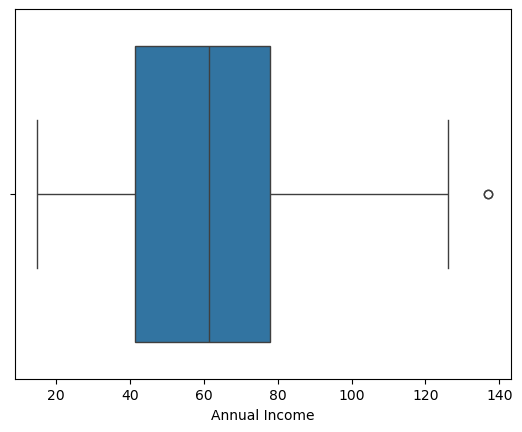

In [11]:
sns.boxplot(x=df["Annual Income"])
plt.show()

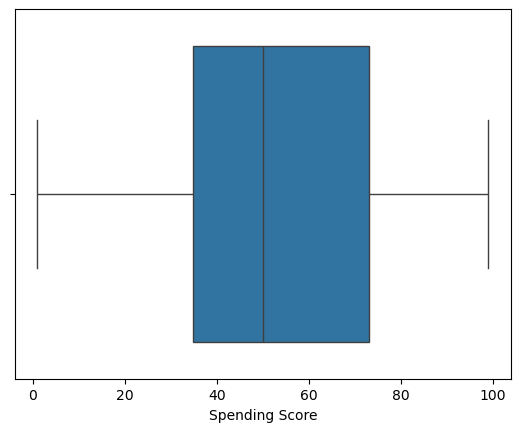

In [12]:
sns.boxplot(x=df["Spending Score"])
plt.show()

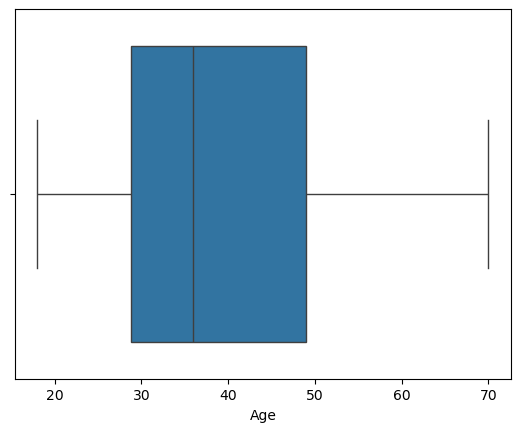

In [13]:
sns.boxplot(x=df["Age"])
plt.show()

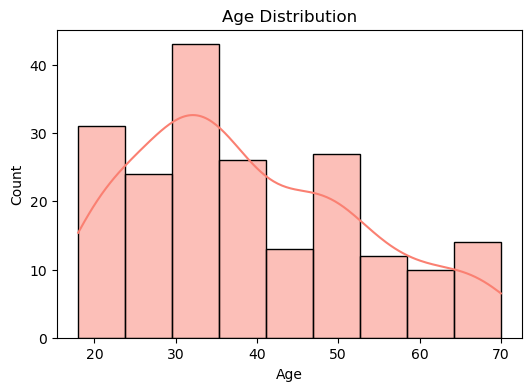

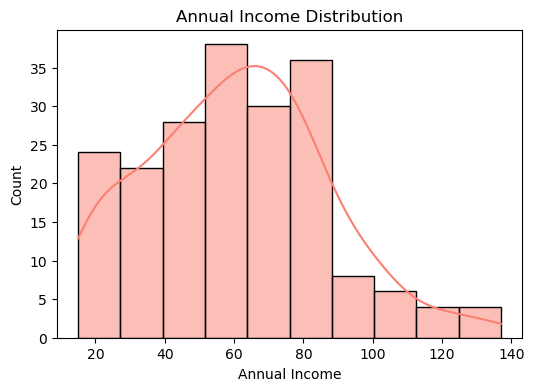

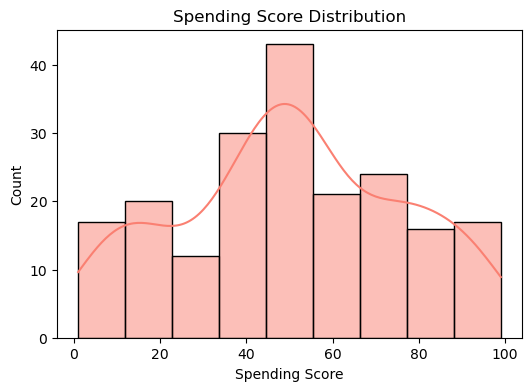

In [14]:
num_cols = ["Age", "Annual Income","Spending Score"]
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True,color="salmon" ) #kde=kernel density estimation
    plt.title(f"{col} Distribution")
    plt.show()

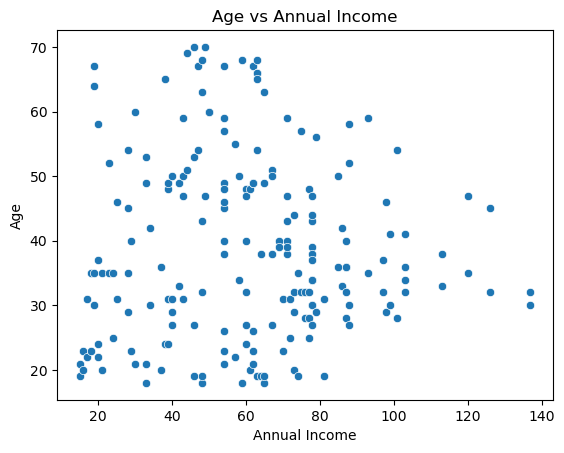

In [15]:
sns.scatterplot(x="Annual Income", y="Age",data=df)
plt.title("Age vs Annual Income")
plt.show()

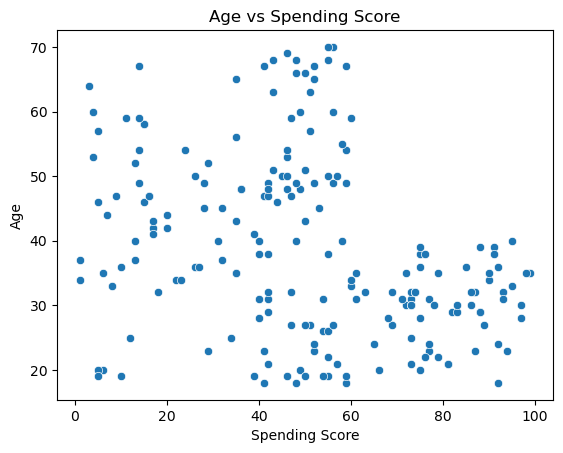

In [16]:
sns.scatterplot(x="Spending Score", y="Age",data=df)
plt.title("Age vs Spending Score")
plt.show()

## Age vs 
* Annual income - nothing unusual observe
* Spending score - younger people tend to have higher spending score...again nothing unsusual

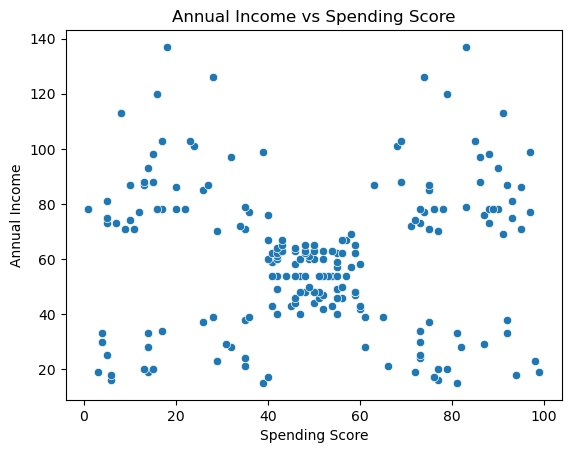

In [17]:
sns.scatterplot(x="Spending Score", y="Annual Income",data=df)
plt.title("Annual Income vs Spending Score")
plt.show()

## Annual Income vs Spending Score
## we start to observe potential clusters..
* High income - low spending
* High income - high spending
* Low income - low spending
* Low income - high spending

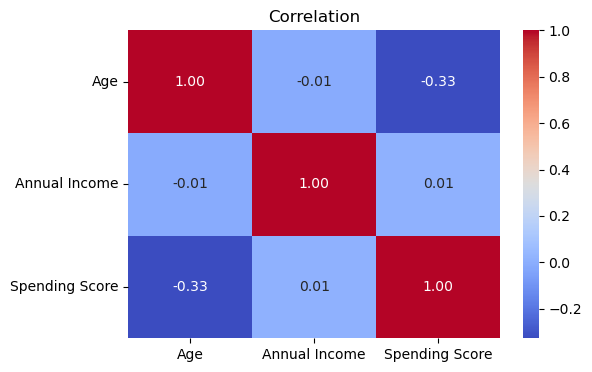

In [18]:
df_corr = df.copy()
num_cols = ["Age","Annual Income","Spending Score"]
corr = df_corr[num_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation")
plt.show()

* Moderate negative correlation between Age and Spending score as understood above

## Scaling

In [19]:
df = df.drop(["CustomerID"],axis=1)

In [20]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler= StandardScaler()

In [23]:
cols= ["Age","Annual Income","Spending Score","Gender"]
scaled_data= scaler.fit_transform(df[cols])

In [24]:
scaled_df = pd.DataFrame(scaled_data, columns=cols)

In [25]:
scaled_df.head()

,Age,Annual Income,Spending Score,Gender
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


## PCA!!!!

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca2=PCA(n_components=2)

In [28]:
data_pca2= pca2.fit_transform(scaled_data)

In [29]:
data_pca2

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

In [30]:
pca2.explained_variance_

array([1.35437369, 1.05449828])

In [31]:
pca2.explained_variance_ratio_

array([0.33690046, 0.26230645])

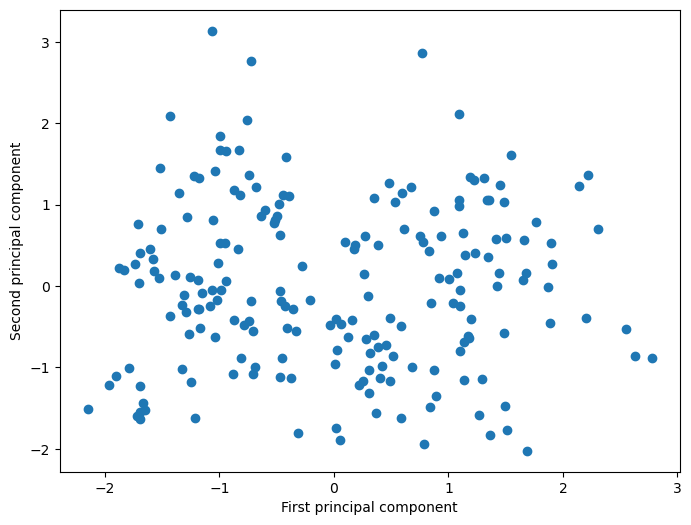

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca2[:,0],data_pca2[:,1],cmap="plasma")
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

In [33]:
pca3=PCA(n_components=3)

In [34]:
data_pca3= pca3.fit_transform(scaled_data)

In [35]:
data_pca3

array([[-4.06382715e-01, -5.20713635e-01,  2.07252663e+00],
       [-1.42767287e+00, -3.67310199e-01,  2.27764369e+00],
       [ 5.07605706e-02, -1.89406774e+00,  3.67375232e-01],
       [-1.69451310e+00, -1.63190805e+00,  7.17466691e-01],
       [-3.13108383e-01, -1.81048272e+00,  4.26459924e-01],
       [-1.71744627e+00, -1.59926418e+00,  6.96379423e-01],
       [ 7.90821124e-01, -1.94727112e+00,  1.86491593e-01],
       [-2.14832159e+00, -1.50537369e+00,  7.58463596e-01],
       [ 2.77428623e+00, -8.82987672e-01,  1.38814112e+00],
       [-1.21629477e+00, -1.61640464e+00,  5.55769702e-01],
       [ 2.62905084e+00, -8.61237043e-01,  1.42011358e+00],
       [-1.68947038e+00, -1.54542784e+00,  6.55007647e-01],
       [ 1.68582253e+00, -2.02394479e+00, -1.69391673e-02],
       [-1.64607339e+00, -1.52251259e+00,  6.10409943e-01],
       [ 1.17443628e+00, -6.12790961e-01,  1.65373684e+00],
       [-1.32613070e+00, -2.36719149e-01,  2.13541457e+00],
       [ 1.67728253e-02, -1.74344572e+00

In [36]:
pca3.explained_variance_

array([1.35437369, 1.05449828, 0.93510105])

In [37]:
pca3.explained_variance_ratio_

array([0.33690046, 0.26230645, 0.23260639])

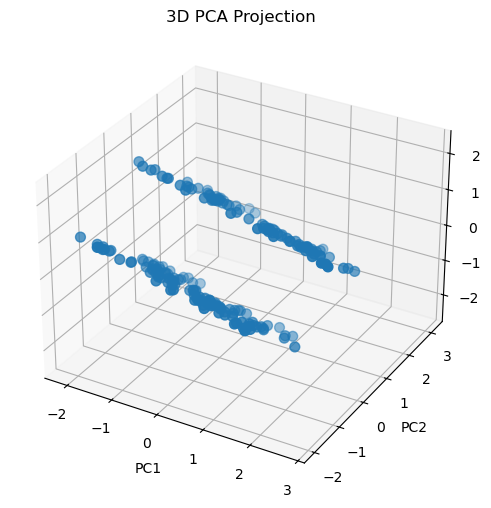

In [38]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca3[:,0], data_pca3[:,1], data_pca3[:,2], s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Projection')
plt.show()

## Clustering Techniques

## 1. K-Means

In [39]:
from sklearn.cluster import KMeans

In [40]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [41]:
wcss=[]
for k in range(1,15):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(data_pca2)
    wcss.append(kmeans.inertia_)

  File "C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\sktmb\Desktop\sample_project_1\env\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sktmb\Desktop\sample_project_1\env\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^

In [42]:
wcss

[479.3655215855872,
 272.1636508869685,
 190.83379325487002,
 126.36518183876075,
 107.21599102867626,
 87.2821501711108,
 82.8318694616064,
 66.27266492548443,
 61.1766422237696,
 52.95147513917418,
 47.14817693869786,
 41.317189164880695,
 36.19331706000677,
 35.04701963848715]

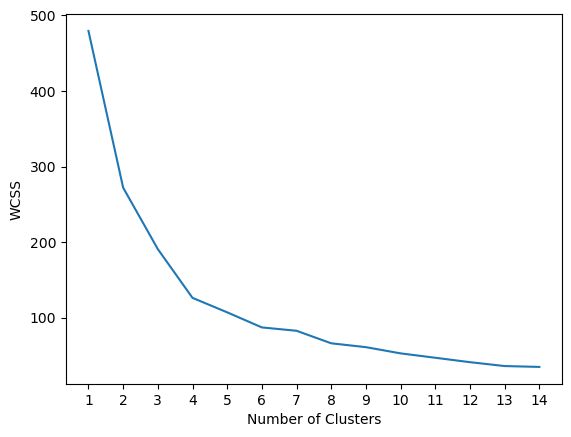

In [43]:
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [44]:
for k in [3, 4, 5, 6]:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(data_pca2)
    sil = silhouette_score(data_pca2, labels)
    print(f"k={k}, silhouette={sil:.4f}")

k=3, silhouette=0.3887
k=4, silhouette=0.4164
k=5, silhouette=0.3878
k=6, silhouette=0.3940


In [45]:
for k in [3, 4, 5, 6]:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(data_pca2)
    dbi = davies_bouldin_score(data_pca2, labels)
    print(f"k={k}, DBI ={dbi:.4f}")

k=3, DBI =0.8905
k=4, DBI =0.7936
k=5, DBI =0.8584
k=6, DBI =0.8366


In [46]:
for k in [3, 4, 5, 6]:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(data_pca2)
    ch  = calinski_harabasz_score(data_pca2, labels)
    print(f"k={k}, CH ={ch:.4f}")

k=3, CH =152.7809
k=4, CH =184.2360
k=5, CH =174.2745
k=6, CH =175.4350


In [47]:
#from kneed import KneeLocator

In [48]:
#kl=KneeLocator(range(1,15),wcss,curve = "convex",direction="decreasing")
#kl.elbow

In [49]:
kmeans= KMeans(n_clusters=4,init="k-means++")

In [50]:
labels =kmeans.fit_predict(data_pca2)
labels

array([2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2,
       1, 2, 1, 2, 2, 2, 1, 0, 2, 3, 1, 3, 1, 3, 2, 3, 3, 0, 1, 1, 3, 0,
       1, 1, 0, 2, 3, 1, 1, 1, 3, 0, 1, 3, 2, 1, 3, 3, 3, 1, 2, 3, 1, 2,
       2, 1, 1, 0, 3, 1, 2, 0, 1, 2, 3, 0, 2, 1, 3, 0, 3, 2, 1, 3, 3, 3,
       3, 2, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 3, 0, 3, 0, 3, 0,
       2, 2, 3, 2, 1, 0, 3, 2, 1, 0, 2, 2, 3, 0, 3, 2, 1, 0, 3, 0, 1, 2,
       1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

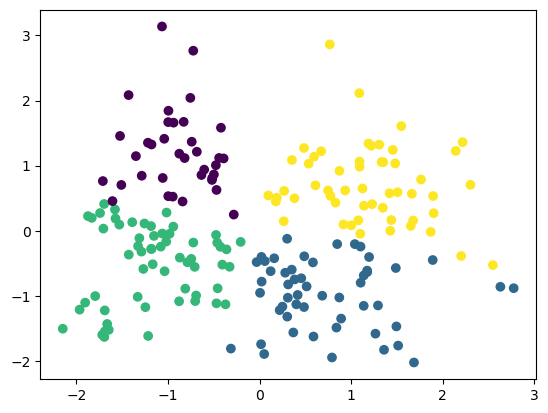

In [51]:
plt.scatter(data_pca2[:,0],data_pca2[:,1],c=labels)
plt.show()

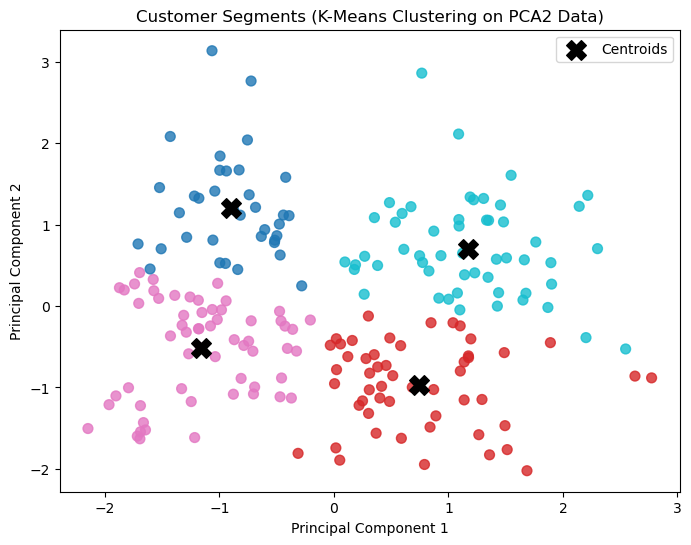

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca2[:,0], data_pca2[:,1], c=labels, cmap='tab10', s=50, alpha=0.8)

# plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, marker='X', label='Centroids')

plt.title("Customer Segments (K-Means Clustering on PCA2 Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

## 2. Heirarchial

In [53]:
import scipy.cluster.hierarchy as sc
from sklearn.cluster import AgglomerativeClustering

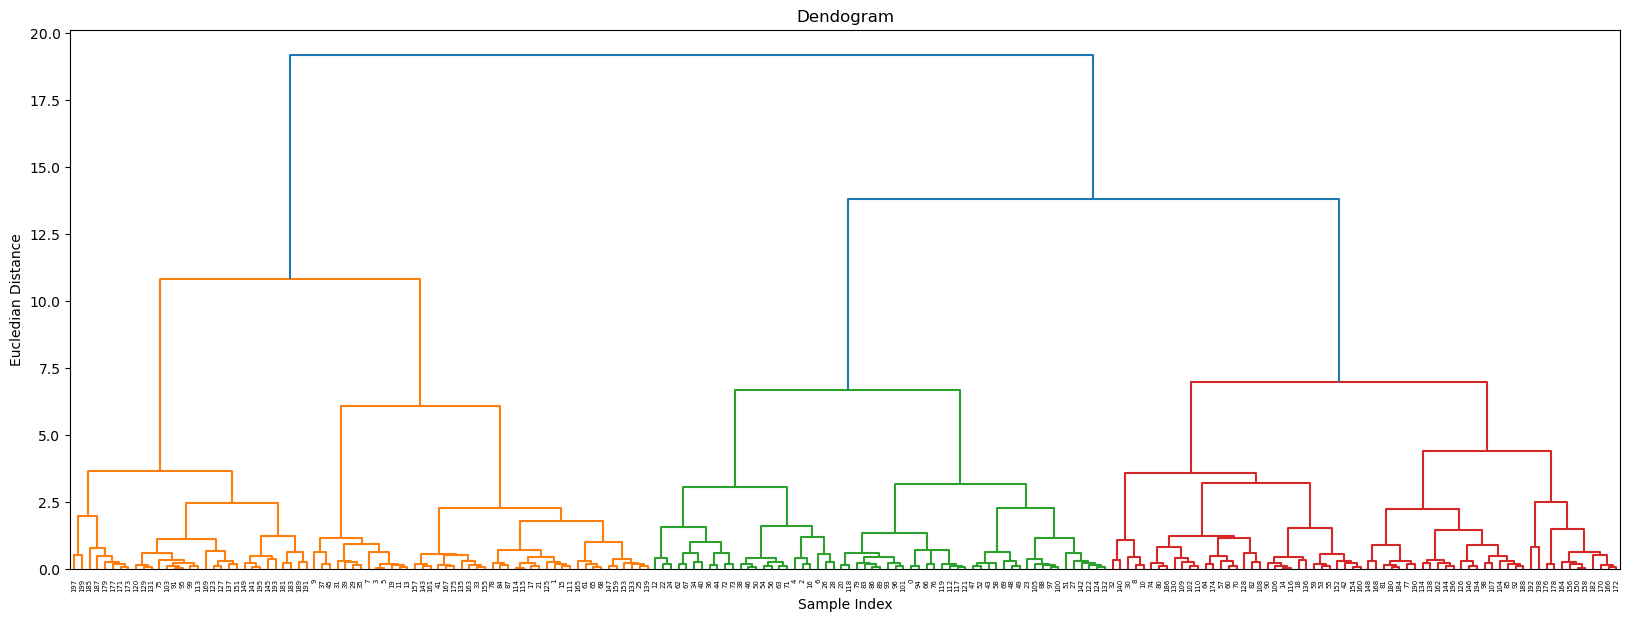

In [54]:
plt.figure(figsize=(20,7))
Z = sc.linkage(data_pca2, method="ward")
sc.dendrogram(Z)
plt.title("Dendogram")
plt.xlabel("Sample Index")
plt.ylabel("Eucledian Distance")
plt.show()

In [55]:
for k in [3, 4]:
    cluster = AgglomerativeClustering(n_clusters=k,metric="euclidean",linkage="ward")
    labels = cluster.fit_predict(data_pca2)
    sil = silhouette_score(data_pca2, labels)
    print(f"k={k}, silhouette={sil:.4f}")

k=3, silhouette=0.3616
k=4, silhouette=0.3718


In [56]:
for k in [3, 4]:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(data_pca2)
    dbi = davies_bouldin_score(data_pca2, labels)
    print(f"k={k}, DBI ={dbi:.4f}")

k=3, DBI =0.8905
k=4, DBI =0.7936


In [57]:
for k in [3, 4]:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(data_pca2)
    ch  = calinski_harabasz_score(data_pca2, labels)
    print(f"k={k}, CH ={ch:.4f}")

k=3, CH =152.7809
k=4, CH =184.2360


In [58]:
cluster = AgglomerativeClustering(n_clusters=4,metric="euclidean",linkage="ward")
cluster.fit(data_pca2)

AgglomerativeClustering(n_clusters=4)

In [59]:
labels_hi =cluster.labels_

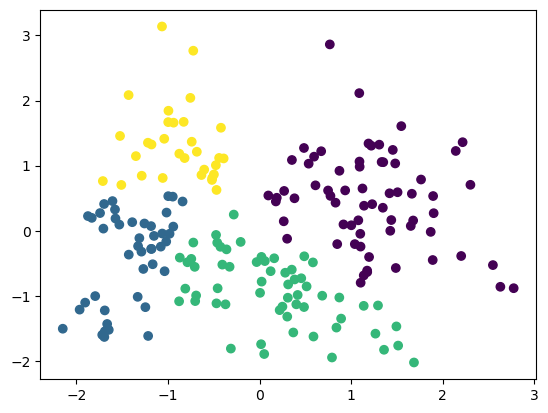

In [60]:
plt.scatter(data_pca2[:,0],data_pca2[:,1],c=labels_hi)
plt.show()

## 3. DBSCAN

In [61]:
from sklearn.cluster import DBSCAN

In [62]:
dbscan=DBSCAN(eps=0.4,min_samples=8)

In [63]:
dbscan.fit(data_pca2)

DBSCAN(eps=0.4, min_samples=8)

In [64]:
dbscan.labels_

array([ 0,  0, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  2,  0, -1,
        0,  2,  1,  0,  0, -1,  0, -1,  0, -1,  0,  0,  1, -1,  1, -1,  0,
       -1,  1, -1, -1,  0,  1, -1,  0,  2, -1, -1, -1,  0,  0,  0,  0,  0,
       -1,  0,  2,  0,  2,  0, -1,  0,  2,  2,  0, -1,  0,  2,  0,  0, -1,
        0,  0,  2,  0,  0,  0,  2,  3,  0,  2,  0,  0,  2,  2, -1,  0,  0,
        2,  0,  0,  0,  0, -1,  3,  2,  0,  0,  3,  0,  0,  2,  3,  0,  0,
        2,  3,  2,  0,  2,  2,  2,  2,  2,  0,  0,  3,  0,  0,  2,  0,  0,
        0,  3,  0,  0,  3,  0,  0,  2,  3, -1,  3,  2,  3,  0,  0,  2,  0,
        2,  3, -1,  0, -1,  3,  0,  0,  2, -1,  2,  0,  0,  3,  2,  3,  0,
        0,  2,  0,  2,  0,  2,  0,  2,  0, -1,  0,  2,  0,  2,  0,  2,  3,
        2,  3,  2,  3,  2,  0, -1,  3, -1,  3,  2,  0,  2,  0,  2, -1,  2,
       -1,  2, -1,  2,  3, -1, -1,  2,  3,  2, -1, -1, -1])

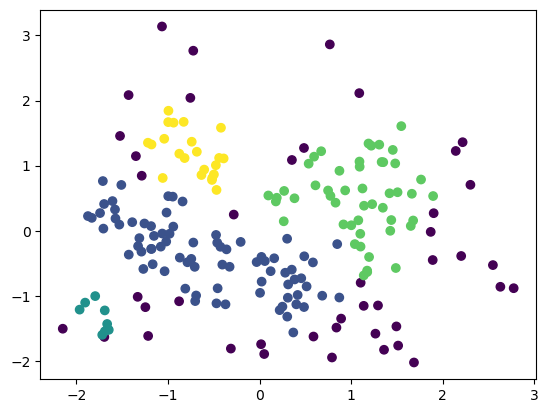

In [65]:
plt.scatter(data_pca2[:,0],data_pca2[:,1],c=dbscan.labels_)
plt.show()

In [66]:
dbscan=DBSCAN(eps=0.4,min_samples=8)
labels = dbscan.fit_predict(data_pca2)
sil = silhouette_score(data_pca2, labels)
print(f"silhouette={sil:.4f}")

silhouette=0.1947


In [67]:
dbscan=DBSCAN(eps=0.4,min_samples=8)
labels = dbscan.fit_predict(data_pca2)
dbi = davies_bouldin_score(data_pca2, labels)
print(f"dbi={dbi:.4f}")

dbi=2.0679


In [68]:
dbscan=DBSCAN(eps=0.4,min_samples=8)
labels = dbscan.fit_predict(data_pca2)
ch  = calinski_harabasz_score(data_pca2, labels)
print(f"CH={ch:.4f}")

CH=35.2163


## 4. HDBSCAN

In [69]:
from sklearn.cluster import HDBSCAN

In [89]:
for k in range(3,10):
    hdb = HDBSCAN(metric = "euclidean",min_cluster_size=k)
    labels = hdb.fit_predict(data_pca2)
    sil = silhouette_score(data_pca2, labels)
    print(f"k={k}, sil ={sil:.4f}")

k=3, sil =0.1490
k=4, sil =0.1055
k=5, sil =0.1053
k=6, sil =0.1268
k=7, sil =0.1234
k=8, sil =0.0976
k=9, sil =0.0039


In [95]:
hdb = HDBSCAN(metric = "euclidean",min_cluster_size=7)

In [96]:
hdb.fit(data_pca2)

HDBSCAN(min_cluster_size=7)

In [97]:
hdb.labels_

array([ 3,  3, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0,  2,  3, -1,
        3, -1,  0,  4,  3, -1,  3, -1,  3, -1,  3, -1,  0, -1,  0, -1,  3,
       -1,  0, -1, -1,  4, -1, -1,  3,  2, -1, -1, -1,  4,  3, -1, -1,  4,
       -1,  3,  2,  4,  2,  4, -1,  3,  2, -1, -1, -1,  4,  2, -1,  4, -1,
       -1,  3,  2,  4, -1,  4,  2,  1,  4,  2,  3,  4,  2, -1, -1,  4,  3,
        2,  4,  3,  3,  4, -1,  1,  2,  4, -1,  1,  4, -1,  2,  1,  3,  4,
        2,  1,  2,  3, -1,  2, -1,  2, -1,  3,  4,  1,  3,  3, -1,  4, -1,
        4,  1, -1,  3,  1,  3,  3,  2,  1, -1,  1, -1,  1,  3,  3,  2,  3,
        2,  1, -1,  3, -1,  1, -1,  3, -1, -1,  2,  3, -1,  1,  2,  1, -1,
        3,  2,  3,  2,  3,  2,  3,  2,  3, -1,  3,  2,  3,  2,  3, -1, -1,
        2,  1,  2,  1,  2,  3, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  2,
       -1, -1, -1, -1, -1, -1, -1,  2,  1, -1, -1, -1, -1])

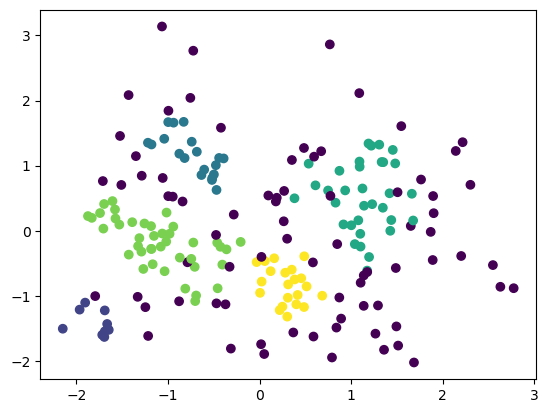

In [98]:
plt.scatter(data_pca2[:,0],data_pca2[:,1],c=hdb.labels_)
plt.show()

In [99]:
sil = silhouette_score(data_pca2, hdb.labels_)
sil

np.float64(0.1233829667976568)

In [101]:
dbi = davies_bouldin_score(data_pca2, hdb.labels_)
dbi

np.float64(1.7281289891470222)